In [1]:
import pandas as pd
pd.options.display.float_format = '{:.5f}'.format
import numpy as np

In [2]:
kospi10 = pd.read_csv('./csv/data/dataset/10년간_코스피.csv', encoding='CP949')

In [3]:
kospi10.sort_values("일자", ascending=True, inplace=True)
kospi10.reset_index(drop=True, inplace=True)
kospi10

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2012/01/02,1826.37000,0.63000,0.03000,1831.69000,1837.81000,1814.55000,323358862,3304263991445,1042325072732398
1,2012/01/03,1875.41000,49.04000,2.69000,1846.56000,1875.41000,1846.56000,443474014,4831853886344,1070059481359981
2,2012/01/04,1866.22000,-9.19000,-0.49000,1883.48000,1884.69000,1866.22000,494500192,4714359793533,1064738869593287
3,2012/01/05,1863.74000,-2.48000,-0.13000,1869.42000,1875.97000,1860.57000,533768493,4856718032241,1063280532248660
4,2012/01/06,1843.14000,-20.60000,-1.11000,1867.12000,1867.12000,1824.29000,472680598,4424490809986,1051727698040334
...,...,...,...,...,...,...,...,...,...,...
2458,2021/12/24,3012.43000,14.26000,0.48000,3009.48000,3025.77000,3009.48000,537548258,8583472759012,2230019405753961
2459,2021/12/27,2999.55000,-12.88000,-0.43000,3013.94000,3017.31000,2999.30000,475363053,8280394735651,2221527069263787
2460,2021/12/28,3020.24000,20.69000,0.69000,3006.77000,3020.29000,2991.55000,607046190,12096893607293,2237623537207572
2461,2021/12/29,2993.29000,-26.95000,-0.89000,3002.90000,3007.72000,2988.67000,545831859,10908667230981,2215462631908994


In [4]:
kospi10['벤치마크지수'] = kospi10['거래대금'] / kospi10['상장시가총액'] * 100
kospi10

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,벤치마크지수
0,2012/01/02,1826.37000,0.63000,0.03000,1831.69000,1837.81000,1814.55000,323358862,3304263991445,1042325072732398,0.31701
1,2012/01/03,1875.41000,49.04000,2.69000,1846.56000,1875.41000,1846.56000,443474014,4831853886344,1070059481359981,0.45155
2,2012/01/04,1866.22000,-9.19000,-0.49000,1883.48000,1884.69000,1866.22000,494500192,4714359793533,1064738869593287,0.44277
3,2012/01/05,1863.74000,-2.48000,-0.13000,1869.42000,1875.97000,1860.57000,533768493,4856718032241,1063280532248660,0.45677
4,2012/01/06,1843.14000,-20.60000,-1.11000,1867.12000,1867.12000,1824.29000,472680598,4424490809986,1051727698040334,0.42069
...,...,...,...,...,...,...,...,...,...,...,...
2458,2021/12/24,3012.43000,14.26000,0.48000,3009.48000,3025.77000,3009.48000,537548258,8583472759012,2230019405753961,0.38491
2459,2021/12/27,2999.55000,-12.88000,-0.43000,3013.94000,3017.31000,2999.30000,475363053,8280394735651,2221527069263787,0.37273
2460,2021/12/28,3020.24000,20.69000,0.69000,3006.77000,3020.29000,2991.55000,607046190,12096893607293,2237623537207572,0.54061
2461,2021/12/29,2993.29000,-26.95000,-0.89000,3002.90000,3007.72000,2988.67000,545831859,10908667230981,2215462631908994,0.49239


In [5]:
kospi10['일자'] = pd.to_datetime(kospi10['일자'])
kospi10['years'] = kospi10['일자'].dt.year
kospi10['month'] = kospi10['일자'].dt.month

In [6]:
kospi10 = kospi10.groupby(['years','month']).mean()


In [7]:
kospi10

종가       대비      등락률         시가         고가         저가  \
years month                                                                 
2012  1     1891.01150  6.50250  0.35000 1888.99850 1899.14850 1877.65900   
      2     2003.23143  3.54571  0.18190 2002.58095 2011.55714 1991.73333   
      3     2023.40714 -0.77190 -0.03429 2026.14238 2033.40476 2015.06905   
      4     1995.91950 -1.60250 -0.07650 1998.44450 2005.59250 1987.57750   
      5     1886.35095 -6.59619 -0.33667 1888.41905 1895.35857 1875.37952   
...                ...      ...      ...        ...        ...        ...   
2021  8     3182.50095 -0.14524  0.00000 3186.79048 3203.94095 3163.42095   
      9     3141.69947 -6.86579 -0.21684 3144.79474 3157.52368 3127.28632   
      10    2989.87316 -5.16526 -0.16632 3001.90789 3013.00211 2975.65895   
      11    2964.30182 -5.98500 -0.20182 2974.73273 2988.29455 2949.97545   
      12    2988.49409  6.30182  0.22182 2982.82955 3001.05409 2967.79773   

                        거래량                 거래대금                 상장시가총액  \
years month                                                               
2012  1     429804367.70000  5417135720887.54980 1079983029535433.37500   
      2     628670904.42857  6848263182942.23828 1144987540961966.00000   
      3     496888183.00000  5368063006735.33301 1161410579737597.00000   
      4     532367218.95000  4965044316867.59961 1148378734606960.75000   
      5     477252828.76190  4691140592440.09570 1085983484360712.75000   
...                     ...                  ...                    ...   
2021  8     657187138.33333 15521821109968.23828 2282889808276699.50000   
      9     751027486.00000 14061364478759.78906 2278255780042245.00000   
      10    732196578.78947 11753813927758.94727 2173605748302466.50000   
      11    626776067.31818 11717785819716.04492 2182238704637083.00000   
      12    484800697.40909  9919548904703.54492 2210272304220711.25000   

             벤치마크지수  
years month          
2012  1     0.49999  
      2     0.59844  
      3     0.46216  
      4     0.43222  
      5     0.43192  
...             ...  
2021  8     0.67948  
      9     0.61756  
      10    0.54153  
      11    0.53777  
      12    0.44895  

[120 rows x 10 columns]

In [8]:

kospi10.rename(columns={'벤치마크지수' : 'kospi벤치마크지수'},inplace=True)

In [9]:
kospi10

종가       대비      등락률         시가         고가         저가  \
years month                                                                 
2012  1     1891.01150  6.50250  0.35000 1888.99850 1899.14850 1877.65900   
      2     2003.23143  3.54571  0.18190 2002.58095 2011.55714 1991.73333   
      3     2023.40714 -0.77190 -0.03429 2026.14238 2033.40476 2015.06905   
      4     1995.91950 -1.60250 -0.07650 1998.44450 2005.59250 1987.57750   
      5     1886.35095 -6.59619 -0.33667 1888.41905 1895.35857 1875.37952   
...                ...      ...      ...        ...        ...        ...   
2021  8     3182.50095 -0.14524  0.00000 3186.79048 3203.94095 3163.42095   
      9     3141.69947 -6.86579 -0.21684 3144.79474 3157.52368 3127.28632   
      10    2989.87316 -5.16526 -0.16632 3001.90789 3013.00211 2975.65895   
      11    2964.30182 -5.98500 -0.20182 2974.73273 2988.29455 2949.97545   
      12    2988.49409  6.30182  0.22182 2982.82955 3001.05409 2967.79773   

                        거래량                 거래대금                 상장시가총액  \
years month                                                               
2012  1     429804367.70000  5417135720887.54980 1079983029535433.37500   
      2     628670904.42857  6848263182942.23828 1144987540961966.00000   
      3     496888183.00000  5368063006735.33301 1161410579737597.00000   
      4     532367218.95000  4965044316867.59961 1148378734606960.75000   
      5     477252828.76190  4691140592440.09570 1085983484360712.75000   
...                     ...                  ...                    ...   
2021  8     657187138.33333 15521821109968.23828 2282889808276699.50000   
      9     751027486.00000 14061364478759.78906 2278255780042245.00000   
      10    732196578.78947 11753813927758.94727 2173605748302466.50000   
      11    626776067.31818 11717785819716.04492 2182238704637083.00000   
      12    484800697.40909  9919548904703.54492 2210272304220711.25000   

             kospi벤치마크지수  
years month               
2012  1          0.49999  
      2          0.59844  
      3          0.46216  
      4          0.43222  
      5          0.43192  
...                  ...  
2021  8          0.67948  
      9          0.61756  
      10         0.54153  
      11         0.53777  
      12         0.44895  

[120 rows x 10 columns]

In [10]:
import os

In [11]:
forders= os.listdir('./csv/data/PBR/')


In [12]:
forders

['PBR12_01.csv',
 'PBR12_02.csv',
 'PBR12_03.csv',
 'PBR12_04.csv',
 'PBR12_05.csv',
 'PBR12_06.csv',
 'PBR12_07.csv',
 'PBR12_08.csv',
 'PBR12_09.csv',
 'PBR12_10.csv',
 'PBR12_11.csv',
 'PBR12_12.csv',
 'PBR13_01.csv',
 'PBR13_02.csv',
 'PBR13_03.csv',
 'PBR13_04.csv',
 'PBR13_05.csv',
 'PBR13_06.csv',
 'PBR13_07.csv',
 'PBR13_08.csv',
 'PBR13_09.csv',
 'PBR13_10.csv',
 'PBR13_11.csv',
 'PBR13_12.csv',
 'PBR14_01.csv',
 'PBR14_02.csv',
 'PBR14_03.csv',
 'PBR14_04.csv',
 'PBR14_05.csv',
 'PBR14_06.csv',
 'PBR14_07.csv',
 'PBR14_08.csv',
 'PBR14_09.csv',
 'PBR14_10.csv',
 'PBR14_11.csv',
 'PBR14_12.csv',
 'PBR15_01.csv',
 'PBR15_02.csv',
 'PBR15_03.csv',
 'PBR15_04.csv',
 'PBR15_05.csv',
 'PBR15_06.csv',
 'PBR15_07.csv',
 'PBR15_08.csv',
 'PBR15_09.csv',
 'PBR15_10.csv',
 'PBR15_11.csv',
 'PBR15_12.csv',
 'PBR16_01.csv',
 'PBR16_02.csv',
 'PBR16_03.csv',
 'PBR16_04.csv',
 'PBR16_05.csv',
 'PBR16_06.csv',
 'PBR16_07.csv',
 'PBR16_08.csv',
 'PBR16_09.csv',
 'PBR16_10.csv',
 'PBR16_11.csv

In [13]:
for i in forders:
     globals()[i.split('.')[0]] = pd.read_csv(f'./csv/data/PBR/{i}', encoding='CP949')

In [14]:
upjong = pd.read_csv('./csv/upjong.csv', encoding='CP949')
upjong.drop(['종목코드','시장구분','종가','대비','등락률','시가총액'],axis=1, inplace=True)

In [15]:
def moo(data):
    data['종목명'] = data['종목명'].str.strip()
    data.drop(['종가','대비','등락률','선행 EPS','선행 PER','주당배당금','배당수익률',"EPS",'PER','BPS'], axis=1, inplace=True)

In [16]:
moo(PBR12_01)
moo(PBR12_02)
moo(PBR12_03)
moo(PBR12_04)
moo(PBR12_05)
moo(PBR12_06)
moo(PBR12_07)
moo(PBR12_08)
moo(PBR12_09)
moo(PBR12_10)
moo(PBR12_11)
moo(PBR12_12)


In [17]:
moo(PBR13_01)
moo(PBR13_02)
moo(PBR13_03)
moo(PBR13_04)
moo(PBR13_05)
moo(PBR13_06)
moo(PBR13_07)
moo(PBR13_08)
moo(PBR13_09)
moo(PBR13_10)
moo(PBR13_11)
moo(PBR13_12)


In [18]:
moo(PBR14_01)
moo(PBR14_02)
moo(PBR14_03)
moo(PBR14_04)
moo(PBR14_05)
moo(PBR14_06)
moo(PBR14_07)
moo(PBR14_08)
moo(PBR14_09)
moo(PBR14_10)
moo(PBR14_11)
moo(PBR14_12)


In [19]:
moo(PBR15_01)
moo(PBR15_02)
moo(PBR15_03)
moo(PBR15_04)
moo(PBR15_05)
moo(PBR15_06)
moo(PBR15_07)
moo(PBR15_08)
moo(PBR15_09)
moo(PBR15_10)
moo(PBR15_11)
moo(PBR15_12)


In [20]:
moo(PBR16_01)
moo(PBR16_02)
moo(PBR16_03)
moo(PBR16_04)
moo(PBR16_05)
moo(PBR16_06)
moo(PBR16_07)
moo(PBR16_08)
moo(PBR16_09)
moo(PBR16_10)
moo(PBR16_11)
moo(PBR16_12)


In [21]:
moo(PBR17_01)
moo(PBR17_02)
moo(PBR17_03)
moo(PBR17_04)
moo(PBR17_05)
moo(PBR17_06)
moo(PBR17_07)
moo(PBR17_08)
moo(PBR17_09)
moo(PBR17_10)
moo(PBR17_11)
moo(PBR17_12)


In [22]:
moo(PBR18_01)
moo(PBR18_02)
moo(PBR18_03)
moo(PBR18_04)
moo(PBR18_05)
moo(PBR18_06)
moo(PBR18_07)
moo(PBR18_08)
moo(PBR18_09)
moo(PBR18_10)
moo(PBR18_11)
moo(PBR18_12)


In [23]:
moo(PBR19_01)
moo(PBR19_02)
moo(PBR19_03)
moo(PBR19_04)
moo(PBR19_05)
moo(PBR19_06)
moo(PBR19_07)
moo(PBR19_08)
moo(PBR19_09)
moo(PBR19_10)
moo(PBR19_11)
moo(PBR19_12)


In [24]:
moo(PBR20_01)
moo(PBR20_02)
moo(PBR20_03)
moo(PBR20_04)
moo(PBR20_05)
moo(PBR20_06)
moo(PBR20_07)
moo(PBR20_08)
moo(PBR20_09)
moo(PBR20_10)
moo(PBR20_11)
moo(PBR20_12)


In [25]:
moo(PBR21_01)
moo(PBR21_02)
moo(PBR21_03)
moo(PBR21_04)
moo(PBR21_05)
moo(PBR21_06)
moo(PBR21_07)
moo(PBR21_08)
moo(PBR21_09)
moo(PBR21_10)
moo(PBR21_11)
moo(PBR21_12)


In [26]:
PBR12_01['years'] = 2012
PBR12_02['years'] = 2012
PBR12_03['years'] = 2012
PBR12_04['years'] = 2012
PBR12_05['years'] = 2012
PBR12_06['years'] = 2012
PBR12_07['years'] = 2012
PBR12_08['years'] = 2012
PBR12_09['years'] = 2012
PBR12_10['years'] = 2012
PBR12_11['years'] = 2012
PBR12_12['years'] = 2012
PBR13_01['years'] = 2013
PBR13_02['years'] = 2013
PBR13_03['years'] = 2013
PBR13_04['years'] = 2013
PBR13_05['years'] = 2013
PBR13_06['years'] = 2013
PBR13_07['years'] = 2013
PBR13_08['years'] = 2013
PBR13_09['years'] = 2013
PBR13_10['years'] = 2013
PBR13_11['years'] = 2013
PBR13_12['years'] = 2013
PBR14_01['years'] = 2014
PBR14_02['years'] = 2014
PBR14_03['years'] = 2014
PBR14_04['years'] = 2014
PBR14_05['years'] = 2014
PBR14_06['years'] = 2014
PBR14_07['years'] = 2014
PBR14_08['years'] = 2014
PBR14_09['years'] = 2014
PBR14_10['years'] = 2014
PBR14_11['years'] = 2014
PBR14_12['years'] = 2014
PBR15_01['years'] = 2015
PBR15_02['years'] = 2015
PBR15_03['years'] = 2015
PBR15_04['years'] = 2015
PBR15_05['years'] = 2015
PBR15_06['years'] = 2015
PBR15_07['years'] = 2015
PBR15_08['years'] = 2015
PBR15_09['years'] = 2015
PBR15_10['years'] = 2015
PBR15_11['years'] = 2015
PBR15_12['years'] = 2015
PBR16_01['years'] = 2016
PBR16_02['years'] = 2016
PBR16_03['years'] = 2016
PBR16_04['years'] = 2016
PBR16_05['years'] = 2016
PBR16_06['years'] = 2016
PBR16_07['years'] = 2016
PBR16_08['years'] = 2016
PBR16_09['years'] = 2016
PBR16_10['years'] = 2016
PBR16_11['years'] = 2016
PBR16_12['years'] = 2016
PBR17_01['years'] = 2017
PBR17_02['years'] = 2017
PBR17_03['years'] = 2017
PBR17_04['years'] = 2017
PBR17_05['years'] = 2017
PBR17_06['years'] = 2017
PBR17_07['years'] = 2017
PBR17_08['years'] = 2017
PBR17_09['years'] = 2017
PBR17_10['years'] = 2017
PBR17_11['years'] = 2017
PBR17_12['years'] = 2017
PBR18_01['years'] = 2018
PBR18_02['years'] = 2018
PBR18_03['years'] = 2018
PBR18_04['years'] = 2018
PBR18_05['years'] = 2018
PBR18_06['years'] = 2018
PBR18_07['years'] = 2018
PBR18_08['years'] = 2018
PBR18_09['years'] = 2018
PBR18_10['years'] = 2018
PBR18_11['years'] = 2018
PBR18_12['years'] = 2018
PBR19_01['years'] = 2019
PBR19_02['years'] = 2019
PBR19_03['years'] = 2019
PBR19_04['years'] = 2019
PBR19_05['years'] = 2019
PBR19_06['years'] = 2019
PBR19_07['years'] = 2019
PBR19_08['years'] = 2019
PBR19_09['years'] = 2019
PBR19_10['years'] = 2019
PBR19_11['years'] = 2019
PBR19_12['years'] = 2019
PBR20_01['years'] = 2020
PBR20_02['years'] = 2020
PBR20_03['years'] = 2020
PBR20_04['years'] = 2020
PBR20_05['years'] = 2020
PBR20_06['years'] = 2020
PBR20_07['years'] = 2020
PBR20_08['years'] = 2020
PBR20_09['years'] = 2020
PBR20_10['years'] = 2020
PBR20_11['years'] = 2020
PBR20_12['years'] = 2020
PBR21_01['years'] = 2021
PBR21_02['years'] = 2021
PBR21_03['years'] = 2021
PBR21_04['years'] = 2021
PBR21_05['years'] = 2021
PBR21_06['years'] = 2021
PBR21_07['years'] = 2021
PBR21_08['years'] = 2021
PBR21_09['years'] = 2021
PBR21_10['years'] = 2021
PBR21_11['years'] = 2021
PBR21_12['years'] = 2021

In [27]:
PBR12_01['month'] = 1
PBR12_02['month'] = 2
PBR12_03['month'] = 3
PBR12_04['month'] = 4
PBR12_05['month'] = 5
PBR12_06['month'] = 6
PBR12_07['month'] = 7
PBR12_08['month'] = 8
PBR12_09['month'] = 9
PBR12_10['month'] = 10
PBR12_11['month'] = 11
PBR12_12['month'] = 12
PBR13_01['month'] = 1
PBR13_02['month'] = 2
PBR13_03['month'] = 3
PBR13_04['month'] = 4
PBR13_05['month'] = 5
PBR13_06['month'] = 6
PBR13_07['month'] = 7
PBR13_08['month'] = 8
PBR13_09['month'] = 9
PBR13_10['month'] = 10
PBR13_11['month'] = 11
PBR13_12['month'] = 12
PBR14_01['month'] = 1
PBR14_02['month'] = 2
PBR14_03['month'] = 3
PBR14_04['month'] = 4
PBR14_05['month'] = 5
PBR14_06['month'] = 6
PBR14_07['month'] = 7
PBR14_08['month'] = 8
PBR14_09['month'] = 9
PBR14_10['month'] = 10
PBR14_11['month'] = 11
PBR14_12['month'] = 12
PBR15_01['month'] = 1
PBR15_02['month'] = 2
PBR15_03['month'] = 3
PBR15_04['month'] = 4
PBR15_05['month'] = 5
PBR15_06['month'] = 6
PBR15_07['month'] = 7
PBR15_08['month'] = 8
PBR15_09['month'] = 9
PBR15_10['month'] = 10
PBR15_11['month'] = 11
PBR15_12['month'] = 12
PBR16_01['month'] = 1
PBR16_02['month'] = 2
PBR16_03['month'] = 3
PBR16_04['month'] = 4
PBR16_05['month'] = 5
PBR16_06['month'] = 6
PBR16_07['month'] = 7
PBR16_08['month'] = 8
PBR16_09['month'] = 9
PBR16_10['month'] = 10
PBR16_11['month'] = 11
PBR16_12['month'] = 12
PBR17_01['month'] = 1
PBR17_02['month'] = 2
PBR17_03['month'] = 3
PBR17_04['month'] = 4
PBR17_05['month'] = 5
PBR17_06['month'] = 6
PBR17_07['month'] = 7
PBR17_08['month'] = 8
PBR17_09['month'] = 9
PBR17_10['month'] = 10
PBR17_11['month'] = 11
PBR17_12['month'] = 12
PBR18_01['month'] = 1
PBR18_02['month'] = 2
PBR18_03['month'] = 3
PBR18_04['month'] = 4
PBR18_05['month'] = 5
PBR18_06['month'] = 6
PBR18_07['month'] = 7
PBR18_08['month'] = 8
PBR18_09['month'] = 9
PBR18_10['month'] = 10
PBR18_11['month'] = 11
PBR18_12['month'] = 12
PBR19_01['month'] = 1
PBR19_02['month'] = 2
PBR19_03['month'] = 3
PBR19_04['month'] = 4
PBR19_05['month'] = 5
PBR19_06['month'] = 6
PBR19_07['month'] = 7
PBR19_08['month'] = 8
PBR19_09['month'] = 9
PBR19_10['month'] = 10
PBR19_11['month'] = 11
PBR19_12['month'] = 12
PBR20_01['month'] = 1
PBR20_02['month'] = 2
PBR20_03['month'] = 3
PBR20_04['month'] = 4
PBR20_05['month'] = 5
PBR20_06['month'] = 6
PBR20_07['month'] = 7
PBR20_08['month'] = 8
PBR20_09['month'] = 9
PBR20_10['month'] = 10
PBR20_11['month'] = 11
PBR20_12['month'] = 12
PBR21_01['month'] = 1
PBR21_02['month'] = 2
PBR21_03['month'] = 3
PBR21_04['month'] = 4
PBR21_05['month'] = 5
PBR21_06['month'] = 6
PBR21_07['month'] = 7
PBR21_08['month'] = 8
PBR21_09['month'] = 9
PBR21_10['month'] = 10
PBR21_11['month'] = 11
PBR21_12['month'] = 12

In [29]:
PBR12 = pd.concat([PBR12_01,PBR12_02,PBR12_03,PBR12_04,PBR12_05,PBR12_06,PBR12_07,PBR12_08,PBR12_09,PBR12_10,PBR12_11,PBR12_12], join='inner')

In [30]:
PBR12 = pd.concat([PBR12_01,PBR12_02,PBR12_03,PBR12_04,PBR12_05,PBR12_06,PBR12_07,PBR12_08,PBR12_09,PBR12_10,PBR12_11,PBR12_12], join='inner')
PBR13 = pd.concat([PBR13_01,PBR13_02,PBR13_03,PBR13_04,PBR13_05,PBR13_06,PBR13_07,PBR13_08,PBR13_09,PBR13_10,PBR13_11,PBR13_12], join='inner')
PBR14 = pd.concat([PBR14_01,PBR14_02,PBR14_03,PBR14_04,PBR14_05,PBR14_06,PBR14_07,PBR14_08,PBR14_09,PBR14_10,PBR14_11,PBR14_12], join='inner')
PBR15 = pd.concat([PBR15_01,PBR15_02,PBR15_03,PBR15_04,PBR15_05,PBR15_06,PBR15_07,PBR15_08,PBR15_09,PBR15_10,PBR15_11,PBR15_12], join='inner')
PBR16 = pd.concat([PBR16_01,PBR16_02,PBR16_03,PBR16_04,PBR16_05,PBR16_06,PBR16_07,PBR16_08,PBR16_09,PBR16_10,PBR16_11,PBR16_12], join='inner')
PBR17 = pd.concat([PBR17_01,PBR17_02,PBR17_03,PBR17_04,PBR17_05,PBR17_06,PBR17_07,PBR17_08,PBR17_09,PBR17_10,PBR17_11,PBR17_12], join='inner')
PBR18 = pd.concat([PBR18_01,PBR18_02,PBR18_03,PBR18_04,PBR18_05,PBR18_06,PBR18_07,PBR18_08,PBR18_09,PBR18_10,PBR18_11,PBR18_12], join='inner')
PBR19 = pd.concat([PBR19_01,PBR19_02,PBR19_03,PBR19_04,PBR19_05,PBR19_06,PBR19_07,PBR19_08,PBR19_09,PBR19_10,PBR19_11,PBR19_12], join='inner')
PBR20 = pd.concat([PBR20_01,PBR20_02,PBR20_03,PBR20_04,PBR20_05,PBR20_06,PBR20_07,PBR20_08,PBR20_09,PBR20_10,PBR20_11,PBR20_12], join='inner')
PBR21 = pd.concat([PBR21_01,PBR21_02,PBR21_03,PBR21_04,PBR21_05,PBR21_06,PBR21_07,PBR21_08,PBR21_09,PBR21_10,PBR21_11,PBR21_12], join='inner')

In [31]:
PBR = pd.concat([PBR12,PBR13,PBR14,PBR15,PBR16,PBR17,PBR18,PBR19,PBR20,PBR21], join='inner')

In [32]:
PBR = PBR.replace('-',np.nan)

In [33]:
PBR

,종목코드,종목명,PBR,years,month
0,138930,BS금융지주,NaN,2012,1
1,001460,BYC,0.45000,2012,1
2,001465,BYC우,NaN,2012,1
3,001040,CJ,0.69000,2012,1
4,079160,CJ CGV,5.57000,2012,1
...,...,...,...,...,...
2425,000547,흥국화재2우B,NaN,2021,12
2426,000545,흥국화재우,NaN,2021,12
2427,003280,흥아해운,NaN,2021,12
2428,037440,희림,1.70000,2021,12


In [34]:
up_12 = pd.read_csv('./csv/12년코스피업종구분.csv', encoding='CP949')
up_13 = pd.read_csv('./csv/13년코스피업종구분.csv', encoding='CP949')
up_14 = pd.read_csv('./csv/14년코스피업종구분.csv', encoding='CP949')
up_15 = pd.read_csv('./csv/15년코스피업종구분.csv', encoding='CP949')
up_16 = pd.read_csv('./csv/16년코스피업종구분.csv', encoding='CP949')

In [35]:
up_12 = up_12[['종목명','업종명']]
up_13 = up_13[['종목명','업종명']]
up_14 = up_14[['종목명','업종명']]
up_15 = up_15[['종목명','업종명']]
up_16 = up_16[['종목명','업종명']]

In [36]:
upjong

,종목명,업종명
0,AJ네트웍스,서비스업
1,AK홀딩스,기타금융
2,BGF,기타금융
3,BGF리테일,유통업
4,BNK금융지주,기타금융
...,...,...
933,휴스틸,철강금속
934,흥국화재,보험
935,흥국화재2우B,보험
936,흥국화재우,보험


In [37]:
upjong = pd.merge(upjong,up_12,on=['종목명','업종명'], how='left')
upjong = pd.merge(upjong,up_13,on=['종목명','업종명'], how='left')
upjong = pd.merge(upjong,up_14,on=['종목명','업종명'], how='left')
upjong = pd.merge(upjong,up_15,on=['종목명','업종명'], how='left')
upjong = pd.merge(upjong,up_16,on=['종목명','업종명'], how='left')

In [38]:
upjong

,종목명,업종명
0,AJ네트웍스,서비스업
1,AK홀딩스,기타금융
2,BGF,기타금융
3,BGF리테일,유통업
4,BNK금융지주,기타금융
...,...,...
933,휴스틸,철강금속
934,흥국화재,보험
935,흥국화재2우B,보험
936,흥국화재우,보험


In [39]:
PBR = pd.merge(PBR,upjong, on='종목명', how='inner')

In [40]:
PBR

,종목코드,종목명,PBR,years,month,업종명
0,001460,BYC,0.45000,2012,1,섬유의복
1,001460,BYC,0.50000,2012,2,섬유의복
2,001460,BYC,0.53000,2012,3,섬유의복
3,001460,BYC,0.52000,2012,4,섬유의복
4,001460,BYC,0.47000,2012,5,섬유의복
...,...,...,...,...,...,...
86119,377300,카카오페이,132.93000,2021,11,기타금융
86120,377300,카카오페이,106.40000,2021,12,기타금융
86121,009810,플레이그램,3.37000,2021,11,유통업
86122,009810,플레이그램,3.28000,2021,12,유통업


In [41]:
PBR_up = PBR.groupby(['years','month','업종명']).mean()
PBR_up

PBR
years month 업종명                
2012  1     건설업         0.74895
            기계          1.01800
            기타금융        0.79917
            기타제조업       0.77889
            농업, 임업 및 어업 1.37250
...                         ...
2021  12    종이목재        0.93222
            증권          0.66167
            철강금속        1.01067
            통신업         2.38600
            화학          1.87162

[2760 rows x 1 columns]

In [42]:
PBR_up.columns=['업종월평균PBR']

In [43]:
PBR_up

업종월평균PBR
years month 업종명                  
2012  1     건설업           0.74895
            기계            1.01800
            기타금융          0.79917
            기타제조업         0.77889
            농업, 임업 및 어업   1.37250
...                           ...
2021  12    종이목재          0.93222
            증권            0.66167
            철강금속          1.01067
            통신업           2.38600
            화학            1.87162

[2760 rows x 1 columns]

In [44]:
PBR = PBR.merge(PBR_up,on=['years','month','업종명'], how='inner')

In [45]:
PBR

,종목코드,종목명,PBR,years,month,업종명,업종월평균PBR
0,001460,BYC,0.45000,2012,1,섬유의복,0.66389
1,001465,BYC우,NaN,2012,1,섬유의복,0.66389
2,007700,F&F,0.66000,2012,1,섬유의복,0.66389
3,001070,대한방직,0.29000,2012,1,섬유의복,0.66389
4,016090,대현,0.74000,2012,1,섬유의복,0.66389
...,...,...,...,...,...,...,...
86119,281820,케이씨텍,1.44000,2021,12,의료정밀,2.64125
86120,145720,덴티움,3.37000,2021,12,의료정밀,2.64125
86121,029460,케이씨,0.52000,2021,12,의료정밀,2.64125
86122,137310,에스디바이오센서,6.97000,2021,12,의료정밀,2.64125


In [46]:
idx = PBR[PBR['종목코드'].str[-1]!='0'].index

In [47]:
PBR = PBR.drop(idx)

In [48]:
PBR.reset_index(drop=True,inplace=True)

In [49]:
PBR

,종목코드,종목명,PBR,years,month,업종명,업종월평균PBR
0,001460,BYC,0.45000,2012,1,섬유의복,0.66389
1,007700,F&F,0.66000,2012,1,섬유의복,0.66389
2,001070,대한방직,0.29000,2012,1,섬유의복,0.66389
3,016090,대현,0.74000,2012,1,섬유의복,0.66389
4,003610,방림,0.23000,2012,1,섬유의복,0.66389
...,...,...,...,...,...,...,...
74506,281820,케이씨텍,1.44000,2021,12,의료정밀,2.64125
74507,145720,덴티움,3.37000,2021,12,의료정밀,2.64125
74508,029460,케이씨,0.52000,2021,12,의료정밀,2.64125
74509,137310,에스디바이오센서,6.97000,2021,12,의료정밀,2.64125


In [50]:
PBR['LOW P/B'] = ''
for i in range(len(PBR)):
    if PBR['PBR'][i] < PBR['업종월평균PBR'][i]:
        PBR['LOW P/B'][i] = 'LOW'
    else :
        PBR['LOW P/B'][i] = 'HIGH'

<ipython-input-50-5fecf843fa8b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PBR['LOW P/B'][i] = 'LOW'
<ipython-input-50-5fecf843fa8b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PBR['LOW P/B'][i] = 'HIGH'


In [51]:
PBR

,종목코드,종목명,PBR,years,month,업종명,업종월평균PBR,LOW P/B
0,001460,BYC,0.45000,2012,1,섬유의복,0.66389,LOW
1,007700,F&F,0.66000,2012,1,섬유의복,0.66389,LOW
2,001070,대한방직,0.29000,2012,1,섬유의복,0.66389,LOW
3,016090,대현,0.74000,2012,1,섬유의복,0.66389,HIGH
4,003610,방림,0.23000,2012,1,섬유의복,0.66389,LOW
...,...,...,...,...,...,...,...,...
74506,281820,케이씨텍,1.44000,2021,12,의료정밀,2.64125,LOW
74507,145720,덴티움,3.37000,2021,12,의료정밀,2.64125,HIGH
74508,029460,케이씨,0.52000,2021,12,의료정밀,2.64125,LOW
74509,137310,에스디바이오센서,6.97000,2021,12,의료정밀,2.64125,HIGH


In [63]:
forders= os.listdir('./csv/data/trade/')

In [64]:
for i in forders:
     globals()[i.split('.')[0]] = pd.read_csv(f'./csv/data/trade/{i}', encoding='CP949')

In [65]:
trade_12_01['years'] = 2012
trade_12_02['years'] = 2012
trade_12_03['years'] = 2012
trade_12_04['years'] = 2012
trade_12_05['years'] = 2012
trade_12_06['years'] = 2012
trade_12_07['years'] = 2012
trade_12_08['years'] = 2012
trade_12_09['years'] = 2012
trade_12_10['years'] = 2012
trade_12_11['years'] = 2012
trade_12_12['years'] = 2012
trade_13_01['years'] = 2013
trade_13_02['years'] = 2013
trade_13_03['years'] = 2013
trade_13_04['years'] = 2013
trade_13_05['years'] = 2013
trade_13_06['years'] = 2013
trade_13_07['years'] = 2013
trade_13_08['years'] = 2013
trade_13_09['years'] = 2013
trade_13_10['years'] = 2013
trade_13_11['years'] = 2013
trade_13_12['years'] = 2013
trade_14_01['years'] = 2014
trade_14_02['years'] = 2014
trade_14_03['years'] = 2014
trade_14_04['years'] = 2014
trade_14_05['years'] = 2014
trade_14_06['years'] = 2014
trade_14_07['years'] = 2014
trade_14_08['years'] = 2014
trade_14_09['years'] = 2014
trade_14_10['years'] = 2014
trade_14_11['years'] = 2014
trade_14_12['years'] = 2014
trade_15_01['years'] = 2015
trade_15_02['years'] = 2015
trade_15_03['years'] = 2015
trade_15_04['years'] = 2015
trade_15_05['years'] = 2015
trade_15_06['years'] = 2015
trade_15_07['years'] = 2015
trade_15_08['years'] = 2015
trade_15_09['years'] = 2015
trade_15_10['years'] = 2015
trade_15_11['years'] = 2015
trade_15_12['years'] = 2015
trade_16_01['years'] = 2016
trade_16_02['years'] = 2016
trade_16_03['years'] = 2016
trade_16_04['years'] = 2016
trade_16_05['years'] = 2016
trade_16_06['years'] = 2016
trade_16_07['years'] = 2016
trade_16_08['years'] = 2016
trade_16_09['years'] = 2016
trade_16_10['years'] = 2016
trade_16_11['years'] = 2016
trade_16_12['years'] = 2016
trade_17_01['years'] = 2017
trade_17_02['years'] = 2017
trade_17_03['years'] = 2017
trade_17_04['years'] = 2017
trade_17_05['years'] = 2017
trade_17_06['years'] = 2017
trade_17_07['years'] = 2017
trade_17_08['years'] = 2017
trade_17_09['years'] = 2017
trade_17_10['years'] = 2017
trade_17_11['years'] = 2017
trade_17_12['years'] = 2017
trade_18_01['years'] = 2018
trade_18_02['years'] = 2018
trade_18_03['years'] = 2018
trade_18_04['years'] = 2018
trade_18_05['years'] = 2018
trade_18_06['years'] = 2018
trade_18_07['years'] = 2018
trade_18_08['years'] = 2018
trade_18_09['years'] = 2018
trade_18_10['years'] = 2018
trade_18_11['years'] = 2018
trade_18_12['years'] = 2018
trade_19_01['years'] = 2019
trade_19_02['years'] = 2019
trade_19_03['years'] = 2019
trade_19_04['years'] = 2019
trade_19_05['years'] = 2019
trade_19_06['years'] = 2019
trade_19_07['years'] = 2019
trade_19_08['years'] = 2019
trade_19_09['years'] = 2019
trade_19_10['years'] = 2019
trade_19_11['years'] = 2019
trade_19_12['years'] = 2019
trade_20_01['years'] = 2020
trade_20_02['years'] = 2020
trade_20_03['years'] = 2020
trade_20_04['years'] = 2020
trade_20_05['years'] = 2020
trade_20_06['years'] = 2020
trade_20_07['years'] = 2020
trade_20_08['years'] = 2020
trade_20_09['years'] = 2020
trade_20_10['years'] = 2020
trade_20_11['years'] = 2020
trade_20_12['years'] = 2020
trade_21_01['years'] = 2021
trade_21_02['years'] = 2021
trade_21_03['years'] = 2021
trade_21_04['years'] = 2021
trade_21_05['years'] = 2021
trade_21_06['years'] = 2021
trade_21_07['years'] = 2021
trade_21_08['years'] = 2021
trade_21_09['years'] = 2021
trade_21_10['years'] = 2021
trade_21_11['years'] = 2021
trade_21_12['years'] = 2021

In [66]:
trade_12_01['month'] = 1
trade_12_02['month'] = 2
trade_12_03['month'] = 3
trade_12_04['month'] = 4
trade_12_05['month'] = 5
trade_12_06['month'] = 6
trade_12_07['month'] = 7
trade_12_08['month'] = 8
trade_12_09['month'] = 9
trade_12_10['month'] = 10
trade_12_11['month'] = 11
trade_12_12['month'] = 12
trade_13_01['month'] = 1
trade_13_02['month'] = 2
trade_13_03['month'] = 3
trade_13_04['month'] = 4
trade_13_05['month'] = 5
trade_13_06['month'] = 6
trade_13_07['month'] = 7
trade_13_08['month'] = 8
trade_13_09['month'] = 9
trade_13_10['month'] = 10
trade_13_11['month'] = 11
trade_13_12['month'] = 12
trade_14_01['month'] = 1
trade_14_02['month'] = 2
trade_14_03['month'] = 3
trade_14_04['month'] = 4
trade_14_05['month'] = 5
trade_14_06['month'] = 6
trade_14_07['month'] = 7
trade_14_08['month'] = 8
trade_14_09['month'] = 9
trade_14_10['month'] = 10
trade_14_11['month'] = 11
trade_14_12['month'] = 12
trade_15_01['month'] = 1
trade_15_02['month'] = 2
trade_15_03['month'] = 3
trade_15_04['month'] = 4
trade_15_05['month'] = 5
trade_15_06['month'] = 6
trade_15_07['month'] = 7
trade_15_08['month'] = 8
trade_15_09['month'] = 9
trade_15_10['month'] = 10
trade_15_11['month'] = 11
trade_15_12['month'] = 12
trade_16_01['month'] = 1
trade_16_02['month'] = 2
trade_16_03['month'] = 3
trade_16_04['month'] = 4
trade_16_05['month'] = 5
trade_16_06['month'] = 6
trade_16_07['month'] = 7
trade_16_08['month'] = 8
trade_16_09['month'] = 9
trade_16_10['month'] = 10
trade_16_11['month'] = 11
trade_16_12['month'] = 12
trade_17_01['month'] = 1
trade_17_02['month'] = 2
trade_17_03['month'] = 3
trade_17_04['month'] = 4
trade_17_05['month'] = 5
trade_17_06['month'] = 6
trade_17_07['month'] = 7
trade_17_08['month'] = 8
trade_17_09['month'] = 9
trade_17_10['month'] = 10
trade_17_11['month'] = 11
trade_17_12['month'] = 12
trade_18_01['month'] = 1
trade_18_02['month'] = 2
trade_18_03['month'] = 3
trade_18_04['month'] = 4
trade_18_05['month'] = 5
trade_18_06['month'] = 6
trade_18_07['month'] = 7
trade_18_08['month'] = 8
trade_18_09['month'] = 9
trade_18_10['month'] = 10
trade_18_11['month'] = 11
trade_18_12['month'] = 12
trade_19_01['month'] = 1
trade_19_02['month'] = 2
trade_19_03['month'] = 3
trade_19_04['month'] = 4
trade_19_05['month'] = 5
trade_19_06['month'] = 6
trade_19_07['month'] = 7
trade_19_08['month'] = 8
trade_19_09['month'] = 9
trade_19_10['month'] = 10
trade_19_11['month'] = 11
trade_19_12['month'] = 12
trade_20_01['month'] = 1
trade_20_02['month'] = 2
trade_20_03['month'] = 3
trade_20_04['month'] = 4
trade_20_05['month'] = 5
trade_20_06['month'] = 6
trade_20_07['month'] = 7
trade_20_08['month'] = 8
trade_20_09['month'] = 9
trade_20_10['month'] = 10
trade_20_11['month'] = 11
trade_20_12['month'] = 12
trade_21_01['month'] = 1
trade_21_02['month'] = 2
trade_21_03['month'] = 3
trade_21_04['month'] = 4
trade_21_05['month'] = 5
trade_21_06['month'] = 6
trade_21_07['month'] = 7
trade_21_08['month'] = 8
trade_21_09['month'] = 9
trade_21_10['month'] = 10
trade_21_11['month'] = 11
trade_21_12['month'] = 12

In [68]:
trade_12 = pd.concat([trade_12_01,trade_12_02,trade_12_03,trade_12_04,trade_12_05,trade_12_06,trade_12_07,trade_12_08,trade_12_09,trade_12_10,trade_12_11,trade_12_12], join='inner')
trade_13 = pd.concat([trade_13_01,trade_13_02,trade_13_03,trade_13_04,trade_13_05,trade_13_06,trade_13_07,trade_13_08,trade_13_09,trade_13_10,trade_13_11,trade_13_12], join='inner')
trade_14 = pd.concat([trade_14_01,trade_14_02,trade_14_03,trade_14_04,trade_14_05,trade_14_06,trade_14_07,trade_14_08,trade_14_09,trade_14_10,trade_14_11,trade_14_12], join='inner')
trade_15 = pd.concat([trade_15_01,trade_15_02,trade_15_03,trade_15_04,trade_15_05,trade_15_06,trade_15_07,trade_15_08,trade_15_09,trade_15_10,trade_15_11,trade_15_12], join='inner')
trade_16 = pd.concat([trade_16_01,trade_16_02,trade_16_03,trade_16_04,trade_16_05,trade_16_06,trade_16_07,trade_16_08,trade_16_09,trade_16_10,trade_16_11,trade_16_12], join='inner')
trade_17 = pd.concat([trade_17_01,trade_17_02,trade_17_03,trade_17_04,trade_17_05,trade_17_06,trade_17_07,trade_17_08,trade_17_09,trade_17_10,trade_17_11,trade_17_12], join='inner')
trade_18 = pd.concat([trade_18_01,trade_18_02,trade_18_03,trade_18_04,trade_18_05,trade_18_06,trade_18_07,trade_18_08,trade_18_09,trade_18_10,trade_18_11,trade_18_12], join='inner')
trade_19 = pd.concat([trade_19_01,trade_19_02,trade_19_03,trade_19_04,trade_19_05,trade_19_06,trade_19_07,trade_19_08,trade_19_09,trade_19_10,trade_19_11,trade_19_12], join='inner')
trade_20 = pd.concat([trade_20_01,trade_20_02,trade_20_03,trade_20_04,trade_20_05,trade_20_06,trade_20_07,trade_20_08,trade_20_09,trade_20_10,trade_20_11,trade_20_12], join='inner')
trade_21 = pd.concat([trade_21_01,trade_21_02,trade_21_03,trade_21_04,trade_21_05,trade_21_06,trade_21_07,trade_21_08,trade_21_09,trade_21_10,trade_21_11,trade_21_12], join='inner')

In [69]:
sang = pd.concat([trade_12,trade_13,trade_14,trade_15,trade_16,trade_17,trade_18,trade_19,trade_20,trade_21], join='inner')

In [53]:
trade = pd.read_csv('./csv/data/trade/trade10.csv', encoding='CP949')

In [55]:
trade.drop(['시장아이디','최고가(종가)','최저가(종가)','표준편차','첨도','공왜도','베타','Amihud','Amivest','Zeros','거래량_일평균','거래대금_일평균'],axis=1,inplace=True)

In [57]:
trade['연월'] = pd.to_datetime(trade['연월'])
trade['years'] = trade['연월'].dt.year
trade['month'] = trade['연월'].dt.month

In [59]:
trade.drop(['연월'],axis=1,inplace=True)

In [60]:
trade

,종목명,종목코드,종가,거래량_합계,거래대금_합계,years,month
0,삼성화재,000810,217500,3313976,693342505597,2012,1
1,세기상사,002420,29800,4348,123862850,2012,1
2,BYC,001460,152000,1583,238897500,2012,1
3,동양우,001525,450,487833,222642036,2012,1
4,조선내화,000480,65000,17975,1146481900,2012,1
...,...,...,...,...,...,...,...
98981,대성산업,128820,4560,26085756,125425271920,2021,12
98982,아세아시멘트,183190,122000,287154,35296258500,2021,12
98983,이연제약,102460,35550,6589235,266121913050,2021,12
98984,효성첨단소재,298050,596000,1521509,990912618000,2021,12


In [243]:
trade.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99325 entries, 0 to 99324
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   회사명      99325 non-null  object 
 1   종가(원)    99134 non-null  float64
 2   거래량(주)   99134 non-null  float64
 3   거래대금(원)  99134 non-null  float64
dtypes: float64(3), object(1)
memory usage: 3.0+ MB


In [148]:
trade.reset_index(drop=True, inplace=True)

In [72]:
sang.drop(['종목코드','종가','대비','등락률','시가','고가','저가','거래량','거래대금'],axis=1,inplace=True)

In [73]:
trade_sang = pd.merge(trade,sang,on=['종목명','years','month'], how='inner')

In [74]:
trade_sang

,종목명,종목코드,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수
0,삼성화재,000810,217500,3313976,693342505597,2012,1,10304027047500,47374837
1,세기상사,002420,29800,4348,123862850,2012,1,12146241600,407592
2,BYC,001460,152000,1583,238897500,2012,1,94941480000,624615
3,동양우,001525,450,487833,222642036,2012,1,2804324400,6231832
4,조선내화,000480,65000,17975,1146481900,2012,1,260000000000,4000000
...,...,...,...,...,...,...,...,...,...
85351,대성산업,128820,4560,26085756,125425271920,2021,12,206273779680,45235478
85352,아세아시멘트,183190,122000,287154,35296258500,2021,12,475288698000,3895809
85353,이연제약,102460,35550,6589235,266121913050,2021,12,639849412350,17998577
85354,효성첨단소재,298050,596000,1521509,990912618000,2021,12,2670049008000,4479948


In [75]:
kospi10

종가       대비      등락률         시가         고가         저가  \
years month                                                                 
2012  1     1891.01150  6.50250  0.35000 1888.99850 1899.14850 1877.65900   
      2     2003.23143  3.54571  0.18190 2002.58095 2011.55714 1991.73333   
      3     2023.40714 -0.77190 -0.03429 2026.14238 2033.40476 2015.06905   
      4     1995.91950 -1.60250 -0.07650 1998.44450 2005.59250 1987.57750   
      5     1886.35095 -6.59619 -0.33667 1888.41905 1895.35857 1875.37952   
...                ...      ...      ...        ...        ...        ...   
2021  8     3182.50095 -0.14524  0.00000 3186.79048 3203.94095 3163.42095   
      9     3141.69947 -6.86579 -0.21684 3144.79474 3157.52368 3127.28632   
      10    2989.87316 -5.16526 -0.16632 3001.90789 3013.00211 2975.65895   
      11    2964.30182 -5.98500 -0.20182 2974.73273 2988.29455 2949.97545   
      12    2988.49409  6.30182  0.22182 2982.82955 3001.05409 2967.79773   

                        거래량                 거래대금                 상장시가총액  \
years month                                                               
2012  1     429804367.70000  5417135720887.54980 1079983029535433.37500   
      2     628670904.42857  6848263182942.23828 1144987540961966.00000   
      3     496888183.00000  5368063006735.33301 1161410579737597.00000   
      4     532367218.95000  4965044316867.59961 1148378734606960.75000   
      5     477252828.76190  4691140592440.09570 1085983484360712.75000   
...                     ...                  ...                    ...   
2021  8     657187138.33333 15521821109968.23828 2282889808276699.50000   
      9     751027486.00000 14061364478759.78906 2278255780042245.00000   
      10    732196578.78947 11753813927758.94727 2173605748302466.50000   
      11    626776067.31818 11717785819716.04492 2182238704637083.00000   
      12    484800697.40909  9919548904703.54492 2210272304220711.25000   

             kospi벤치마크지수  
years month               
2012  1          0.49999  
      2          0.59844  
      3          0.46216  
      4          0.43222  
      5          0.43192  
...                  ...  
2021  8          0.67948  
      9          0.61756  
      10         0.54153  
      11         0.53777  
      12         0.44895  

[120 rows x 10 columns]

In [76]:
kospi10.drop(['종가','대비','등락률','시가','고가','저가','거래량','거래대금','상장시가총액'],axis=1, inplace=True)

In [77]:
trade_kospi = pd.merge(trade_sang,kospi10,on=['years','month'], how='inner')

In [78]:
trade_kospi.set_index(['종목명'], inplace=True)

In [81]:
trade_kospi['시가총액대비거래대금'] = (trade_kospi['거래대금_합계']/trade_kospi['시가총액'])*100

In [82]:
trade_kospi

,종목코드,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금
종목명,,,,,,,,,,
삼성화재,000810,217500,3313976,693342505597,2012,1,10304027047500,47374837,0.49999,6.72885
세기상사,002420,29800,4348,123862850,2012,1,12146241600,407592,0.49999,1.01976
BYC,001460,152000,1583,238897500,2012,1,94941480000,624615,0.49999,0.25163
동양우,001525,450,487833,222642036,2012,1,2804324400,6231832,0.49999,7.93924
조선내화,000480,65000,17975,1146481900,2012,1,260000000000,4000000,0.49999,0.44095
...,...,...,...,...,...,...,...,...,...,...
대성산업,128820,4560,26085756,125425271920,2021,12,206273779680,45235478,0.44895,60.80524
아세아시멘트,183190,122000,287154,35296258500,2021,12,475288698000,3895809,0.44895,7.42628
이연제약,102460,35550,6589235,266121913050,2021,12,639849412350,17998577,0.44895,41.59134


In [83]:
idx = trade_kospi[trade_kospi['종목코드'].str[-1]!='0'].index
trade_kospi = trade_kospi.drop(idx)

In [84]:
trade_kospi

,종목코드,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금
종목명,,,,,,,,,,
삼성화재,000810,217500,3313976,693342505597,2012,1,10304027047500,47374837,0.49999,6.72885
세기상사,002420,29800,4348,123862850,2012,1,12146241600,407592,0.49999,1.01976
BYC,001460,152000,1583,238897500,2012,1,94941480000,624615,0.49999,0.25163
조선내화,000480,65000,17975,1146481900,2012,1,260000000000,4000000,0.49999,0.44095
유진투자증권,001200,3785,6597860,23554780295,2012,1,219444527130,57977418,0.49999,10.73382
...,...,...,...,...,...,...,...,...,...,...
대성산업,128820,4560,26085756,125425271920,2021,12,206273779680,45235478,0.44895,60.80524
아세아시멘트,183190,122000,287154,35296258500,2021,12,475288698000,3895809,0.44895,7.42628
이연제약,102460,35550,6589235,266121913050,2021,12,639849412350,17998577,0.44895,41.59134


In [86]:
trade_kospi['소외주'] = ''
for i in range(len(trade_kospi)):
    if trade_kospi['시가총액대비거래대금'][i] < trade_kospi['kospi벤치마크지수'][i]:
        trade_kospi['소외주'][i] = 'so'
    else :
        trade_kospi['소외주'][i] = 'not_so'

<ipython-input-86-3f34b3ae6244>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_kospi['소외주'] = ''
<ipython-input-86-3f34b3ae6244>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_kospi['소외주'][i] = 'not_so'
c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns,

In [87]:
trade_kospi

,종목코드,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금,소외주
종목명,,,,,,,,,,,
삼성화재,000810,217500,3313976,693342505597,2012,1,10304027047500,47374837,0.49999,6.72885,not_so
세기상사,002420,29800,4348,123862850,2012,1,12146241600,407592,0.49999,1.01976,not_so
BYC,001460,152000,1583,238897500,2012,1,94941480000,624615,0.49999,0.25163,so
조선내화,000480,65000,17975,1146481900,2012,1,260000000000,4000000,0.49999,0.44095,so
유진투자증권,001200,3785,6597860,23554780295,2012,1,219444527130,57977418,0.49999,10.73382,not_so
...,...,...,...,...,...,...,...,...,...,...,...
대성산업,128820,4560,26085756,125425271920,2021,12,206273779680,45235478,0.44895,60.80524,not_so
아세아시멘트,183190,122000,287154,35296258500,2021,12,475288698000,3895809,0.44895,7.42628,not_so
이연제약,102460,35550,6589235,266121913050,2021,12,639849412350,17998577,0.44895,41.59134,not_so


In [88]:
PBR

,종목코드,종목명,PBR,years,month,업종명,업종월평균PBR,LOW P/B
0,001460,BYC,0.45000,2012,1,섬유의복,0.66389,LOW
1,007700,F&F,0.66000,2012,1,섬유의복,0.66389,LOW
2,001070,대한방직,0.29000,2012,1,섬유의복,0.66389,LOW
3,016090,대현,0.74000,2012,1,섬유의복,0.66389,HIGH
4,003610,방림,0.23000,2012,1,섬유의복,0.66389,LOW
...,...,...,...,...,...,...,...,...
74506,281820,케이씨텍,1.44000,2021,12,의료정밀,2.64125,LOW
74507,145720,덴티움,3.37000,2021,12,의료정밀,2.64125,HIGH
74508,029460,케이씨,0.52000,2021,12,의료정밀,2.64125,LOW
74509,137310,에스디바이오센서,6.97000,2021,12,의료정밀,2.64125,HIGH


In [89]:
PBR[PBR['종목명']=='LS네트웍스']

,종목코드,종목명,PBR,years,month,업종명,업종월평균PBR,LOW P/B
22713,000680,LS네트웍스,0.44000,2012,1,유통업,1.02390,LOW
22757,000680,LS네트웍스,0.49000,2012,2,유통업,1.09220,LOW
22801,000680,LS네트웍스,0.48000,2012,3,유통업,1.06122,LOW
22845,000680,LS네트웍스,0.46000,2012,4,유통업,0.99295,LOW
22889,000680,LS네트웍스,0.41000,2012,5,유통업,0.94045,LOW
...,...,...,...,...,...,...,...,...
28446,000680,LS네트웍스,0.62000,2021,8,유통업,1.51933,LOW
28506,000680,LS네트웍스,0.58000,2021,9,유통업,1.50967,LOW
28566,000680,LS네트웍스,0.52000,2021,10,유통업,1.48918,LOW
28627,000680,LS네트웍스,0.42000,2021,11,유통업,1.35177,LOW


In [90]:
idx = PBR[PBR['LOW P/B']=='HIGH'].index
PBR_LOW = PBR.drop(idx)

In [98]:
idx = trade_kospi[trade_kospi['소외주']=='not_so'].index
trade_kospi_LOW = trade_kospi.drop(idx)

In [99]:
trade_kospi.reset_index(inplace=True)

In [100]:
trade_kospi[trade_kospi['종목명']=='LS네트웍스']

,index,종목명,종목코드,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금,소외주
62,62,LS네트웍스,000680,4580,564888,2498871105,2012,1,351426949500,76730775,0.49999,0.71106,not_so
524,524,LS네트웍스,000680,5140,1459501,7221129345,2012,2,395650795820,76974863,0.59844,1.82513,not_so
996,996,LS네트웍스,000680,5050,3152022,16492374495,2012,3,389350697400,77099148,0.46216,4.23587,not_so
1907,1907,LS네트웍스,000680,4820,2040877,10564448730,2012,4,372128133740,77205007,0.43222,2.83893,not_so
2037,2037,LS네트웍스,000680,4275,688257,3174402595,2012,5,330052785750,77205330,0.43192,0.96179,not_so
...,...,...,...,...,...,...,...,...,...,...,...,...,...
70660,70660,LS네트웍스,000680,3900,2930604,11692428415,2021,8,307331762400,78803016,0.67948,3.80450,not_so
70853,70853,LS네트웍스,000680,3645,14940130,64984002955,2021,9,287236993320,78803016,0.61756,22.62383,not_so
71645,71645,LS네트웍스,000680,3225,1850813,6207396675,2021,10,254139726600,78803016,0.54153,2.44251,not_so
73076,73076,LS네트웍스,000680,2655,8771252,31190853540,2021,11,209222007480,78803016,0.53777,14.90802,not_so


In [101]:
trade_kospi_LOW['종목코드'].unique()

array(['001460', '000480', '000670', '002840', '000540', '001340',
       '002150', '004080', '001940', '001560', '001270', '003830',
       '004450', '002600', '008500', '006570', '006220', '010770',
       '007590', '009070', '005800', '016800', '008870', '017390',
       '092230', '096300', '034590', '034310', '058650', '000950',
       '003090', '004970', '025000', '021820', '007210', '005810',
       '003120', '003460', '004270', '001720', '002870', '003960',
       '009140', '025530', '072710', '155900', '000050', '000760',
       '003080', '005250', '000650', '005720', '023960', '134380',
       '014820', '006740', '152550', '019490', '009970', '023450',
       '000430', '009770', '015890', '037710', '004250', '009680',
       '000680', '002780', '168490', '024070', '009190', '008110',
       '006370', '003480', '004700', '204210', '015360', '268280',
       '023000', '003650', '282690', '075180', '024090', '280360',
       '005820', '003300', '138040', '004890'], dtype=object)

In [279]:
PBR_so = pd.merge(trade_kospi,PBR,on=['종목명','years','month'], how='inner')

In [284]:
PBR_so.drop(['index'],axis=1,inplace=True)

In [286]:
PBR_so.drop(['종목코드_x','종가','거래량_합계','거래대금_합계','시가총액','상장주식수','소외주','종목코드_y','업종명','LOW P/B'],axis=1,inplace=True)

In [102]:
small_PBR = pd.merge(trade_kospi_LOW,PBR_LOW,on=['종목명','years','month'], how='inner')

In [103]:
small_PBR.sort_values(['종가'],ascending=True,inplace=True)

In [104]:
small_PBR

,종목명,종목코드_x,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금,소외주,종목코드_y,PBR,업종명,업종월평균PBR,LOW P/B
791,LS네트웍스,000680,1895,570634,1105093575,2020,5,149331715320,78803016,0.75216,0.74003,so,000680,0.29000,유통업,1.13786,LOW
812,유화증권,003460,2150,117650,253592075,2020,7,121910192250,56702415,0.87474,0.20802,so,003460,0.35000,증권,0.49647,LOW
801,유화증권,003460,2180,345887,768688045,2020,6,123611264700,56702415,0.91040,0.62186,so,003460,0.35000,증권,0.46235,LOW
826,유화증권,003460,2220,300505,662913325,2020,8,125879361300,56702415,1.01383,0.52663,so,003460,0.36000,증권,0.51000,LOW
849,유화증권,003460,2230,195263,441872760,2020,10,126446385450,56702415,0.67319,0.34945,so,003460,0.36000,증권,0.51647,LOW
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
412,광주신세계,037710,249500,3425,867661000,2016,7,399200000000,1600000,0.33167,0.21735,so,037710,0.81000,유통업,1.47429,LOW
406,광주신세계,037710,254000,6216,1632374500,2016,6,406400000000,1600000,0.41500,0.40167,so,037710,0.83000,유통업,1.42042,LOW
600,미원상사,002840,256500,1500,377425500,2018,9,203388597000,792938,0.39313,0.18557,so,002840,1.12000,화학,1.74489,LOW
424,광주신세계,037710,259500,4732,1231348500,2016,9,415200000000,1600000,0.34943,0.29657,so,037710,0.84000,유통업,1.56163,LOW


In [107]:
small_PBR.drop(['종목코드_x'],axis=1,inplace=True)

In [177]:
from pykrx import stock
from pykrx import bond
import matplotlib.pyplot as plt

In [185]:
def chart(code):
    data_df = stock.get_market_ohlcv('20120102','20211231', code, "m")
    data_df_d = stock.get_market_ohlcv('20120102','20211231', code, "d")
    data_df.drop(['시가','저가','고가'],axis=1,inplace=True)
    data_df_d.drop(['시가','저가','고가'],axis=1,inplace=True)
    
    xs=data_df.index.to_list()					#플롯할 데이터 모두 list로 저장
    ys_close=data_df['종가'].to_list()
    ys_volume=data_df['거래량'].to_list()

    plt.figure(figsize=(20, 10))					#전체 그래프 크기 설정

    plt.subplot(2,1,1)						#2행 1열에서 1번째 그래프 지정
    plt.plot(xs, ys_close, 'o-', ms=3, lw=1, label='close')		#xy데이터 플롯-line		#xy데이터 플롯	
    plt.xlabel('Date')						#x축 이름 
    plt.ylabel('Price')				#y축 이름
    plt.legend()							#범례 표시
    

    plt.subplot(2,1,2)						#2행 1열에서 2번재 그래프 지정
    plt.plot(xs, ys_volume, ms=3, lw=1,color='grey', label='volume')		#xy데이터 플롯-bar
    plt.xlabel('Date')						#x축 이름
    plt.ylabel('Volume')						#y축 이름
    plt.legend()	
    
    						#범례 표시

    xs=data_df_d.index.to_list()
    ys_close_d=data_df_d['종가'].to_list()
    ys_volume_d=data_df_d['거래량'].to_list()

    plt.figure(figsize=(20, 10))

    plt.subplot(2,1,1)						#2행 1열에서 1번째 그래프 지정
    plt.plot(xs, ys_close_d, 'o-', ms=3, lw=1)		#xy데이터 플롯-line		#xy데이터 플롯	
    plt.xlabel('Date')						#x축 이름 
    plt.ylabel('Price ')				#y축 이름
    plt.legend()
    new_gs = data_df_d[data_df_d['거래량']!=0]

    # Moving average
    ma5 = new_gs['종가'].rolling(window=5).mean()
    ma20 = new_gs['종가'].rolling(window=20).mean()
    ma60 = new_gs['종가'].rolling(window=60).mean()
    ma120 = new_gs['종가'].rolling(window=120).mean()
    ma240 = new_gs['종가'].rolling(window=240).mean()
    plt.legend()
    # Insert columns
    new_gs.insert(len(new_gs.columns), "MA5", ma5)
    new_gs.insert(len(new_gs.columns), "MA20", ma20)
    new_gs.insert(len(new_gs.columns), "MA60", ma60)
    new_gs.insert(len(new_gs.columns), "MA120", ma120)
    new_gs.insert(len(new_gs.columns), "MA240", ma240)

    # Plot
    plt.plot(new_gs.index, new_gs['종가'], label='종가')
    plt.plot(new_gs.index, new_gs['MA5'], label='MA5')
    plt.plot(new_gs.index, new_gs['MA20'], label='MA20')
    plt.plot(new_gs.index, new_gs['MA60'], label='MA60')
    plt.plot(new_gs.index, new_gs['MA120'], label='MA120')
    plt.plot(new_gs.index, new_gs['MA240'], label='MA240')

    plt.subplot(2,1,2)						#2행 1열에서 1번째 그래프 지정
    plt.plot(xs, ys_volume_d, 'o-', ms=3, lw=1, label='volume')		#xy데이터 플롯-line		#xy데이터 플롯	
    plt.xlabel('Date')						#x축 이름 
    plt.ylabel('volume')				#y축 이름
    plt.legend()


    

In [186]:
small_PBR['종목명'].unique()

array(['LS네트웍스', '유화증권', '에쓰씨엔지니어링', '평화홀딩스', '흥국화재', '삼원강재', '제주은행',
       'SJM홀딩스', '대림통상', 'NPC', '대동전자', '한진중공업홀딩스', '새론오토모티브', '도화엔지니어링',
       'WISCOM', '대원강업', '태경산업', '하이트론', '제일연마', '동방아그로', '넥센', '이화산업',
       '신흥', '동원시스템즈', '신풍제지', '남성', '대구백화점', '메리츠금융지주', '모토닉', '동아타이어',
       '경방', '사조대림', '세원정공', 'KISCO홀딩스', '부국증권', '디씨엠', '경인전자', '신라교역',
       '일정실업', '녹십자홀딩스', '대웅', 'KCTC', '원림', '영풍제지', '삼화왕관', '전방',
       '풍산홀딩스', '성보화학', '퍼시스', '천일고속', '삼정펄프', '신영증권', '금비', '동남합성',
       '예스코홀딩스', '조광피혁', '백광산업', '미원화학', 'KPX홀딩스', '영원무역홀딩스', '한일홀딩스',
       '서울가스', 'NICE', '농심홀딩스', 'KPX케미칼', '미창석유', '조선내화', '미원에스씨',
       '세아홀딩스', '조흥', '동일산업', '대한화섬', '일성신약', '신영와코루', '미원상사', '광주신세계',
       '롯데제과', 'BYC'], dtype=object)

In [190]:
small_PBR[small_PBR['종목명']=='유화증권']


,종목명,종가,거래량_합계,거래대금_합계,years,month,시가총액,상장주식수,kospi벤치마크지수,시가총액대비거래대금,소외주,종목코드_y,PBR,업종명,업종월평균PBR,LOW P/B
812,유화증권,2150,117650,253592075,2020,7,121910192250,56702415,0.87474,0.20802,so,003460,0.35000,증권,0.49647,LOW
801,유화증권,2180,345887,768688045,2020,6,123611264700,56702415,0.91040,0.62186,so,003460,0.35000,증권,0.46235,LOW
826,유화증권,2220,300505,662913325,2020,8,125879361300,56702415,1.01383,0.52663,so,003460,0.36000,증권,0.51000,LOW
849,유화증권,2230,195263,441872760,2020,10,126446385450,56702415,0.67319,0.34945,so,003460,0.36000,증권,0.51647,LOW
792,유화증권,2250,122061,278452710,2020,5,127580433750,56702415,0.75216,0.21826,so,003460,0.36000,증권,0.47294,LOW
871,유화증권,2255,410658,925547010,2021,2,127863945825,56702415,0.89556,0.72385,so,003460,0.36000,증권,0.59706,LOW
863,유화증권,2310,435717,1035626995,2020,12,130982578650,56702415,0.95906,0.79066,so,003460,0.37000,증권,0.58529,LOW
770,유화증권,10950,43316,491409550,2020,2,124178288850,11340483,0.52166,0.39573,so,003460,0.36000,증권,0.45750,LOW
232,유화증권,11650,10257,120166450,2013,8,132116626950,11340483,0.34573,0.09095,so,003460,0.37000,증권,0.57000,LOW
253,유화증권,11850,26834,317562400,2013,10,134384723550,11340483,0.35689,0.23631,so,003460,0.37000,증권,0.60000,LOW


No handles with labels found to put in legend.
No handles with labels found to put in legend.


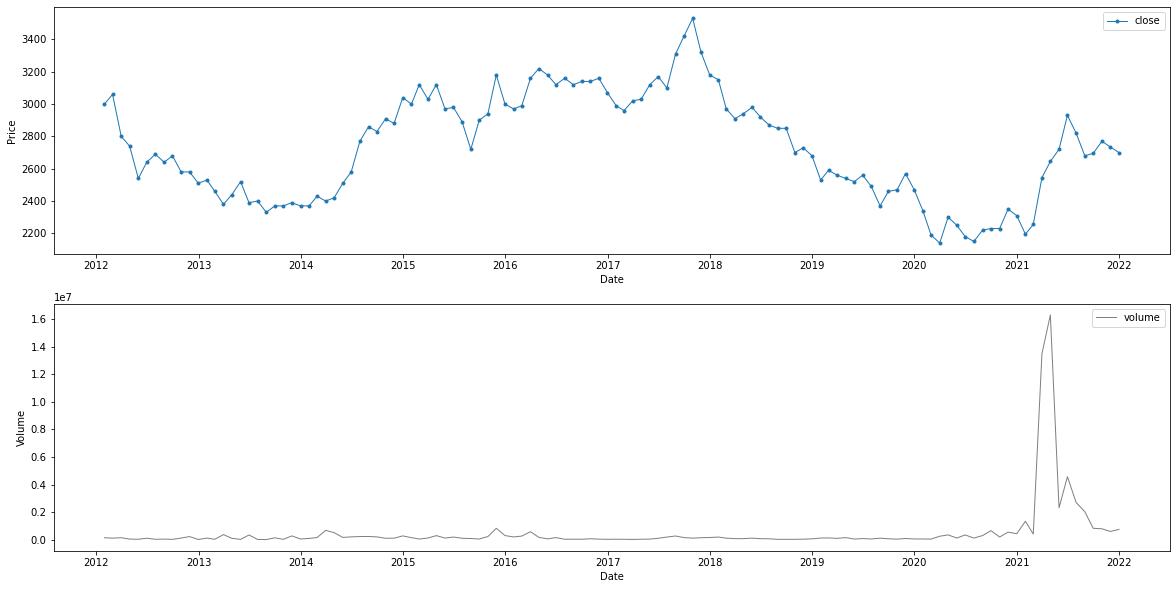

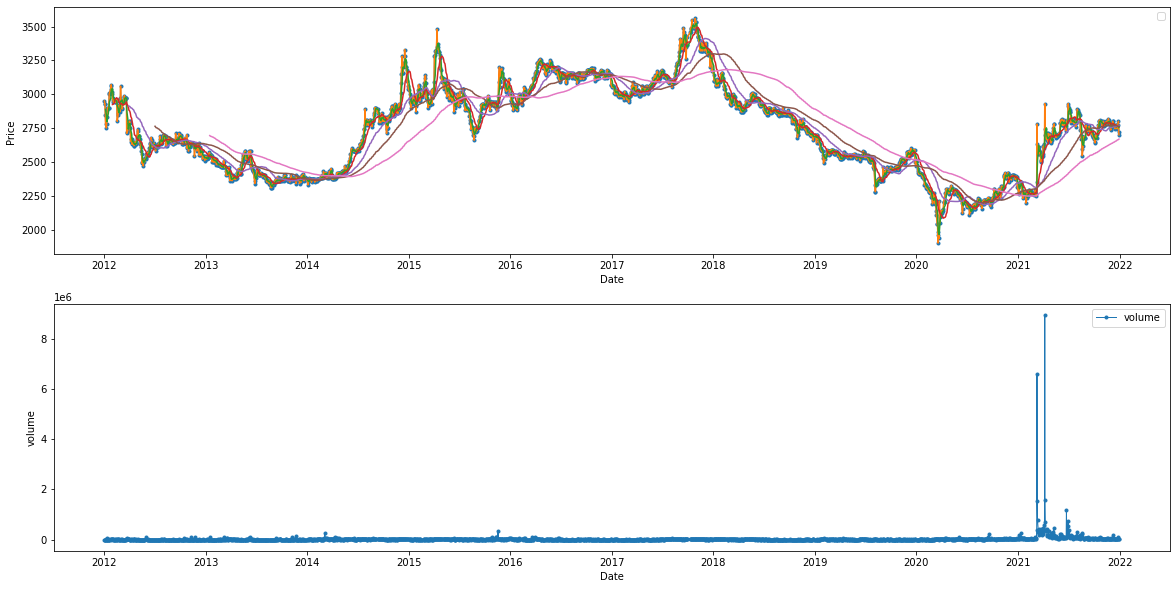

In [191]:
chart('003460')

In [292]:
def ma_d(code,name):
    df_d = stock.get_market_ohlcv('20110701','20211231', code, "d")
    df_d['종목명'] = name
    df_d.drop(['저가'],axis=1,inplace=True)
    df_d['ma20'] = df_d['종가'].rolling(window=20).mean()
    df_d['ma60'] = df_d['종가'].rolling(window=60).mean()
    df_d['ma120'] = df_d['종가'].rolling(window=120).mean()
    df_d['거래량등락률'] = ((df_d['거래량'] - df_d['거래량'].shift(1))/df_d['거래량'].shift(1))*100
    df_d['등락률'] = ((df_d['종가'] - df_d['종가'].shift(1))/df_d['종가'].shift(1))*100
    df_d.reset_index(inplace=True)
    df_d['years'] = df_d['날짜'].dt.year
    df_d['month'] = df_d['날짜'].dt.month
    df_d['월최고가'] = df_d['고가'].rolling(window=20).max()
    df_d = df_d.iloc[126:]
    df_d.reset_index(drop=True,inplace=True)
    df_d['변화량'] = df_d['종가'] - df_d['종가'].shift(1)
    df_d['상승폭'] = np.where(df_d['변화량']>=0, df_d['변화량'], 0)
    df_d['하락폭'] = np.where(df_d['변화량'] <0, df_d['변화량'].abs(), 0)
    df_d['AU'] = df_d['상승폭'].ewm(alpha=1/10, min_periods=10).mean()
    df_d['AD'] = df_d['하락폭'].ewm(alpha=1/10, min_periods=10).mean()
    #df_d['RS'] = df_d['AU'] / df_d['AD']
    #df_d['RSI'] = 100 - (100 / (1 + df_d['RS']))
    df_d['RSI'] = df_d['AU'] / (df_d['AU'] + df_d['AD']) * 100
    df_d['RSI'].dropna(axis=0,inplace=True)
    df_d.set_index(['날짜'],inplace=True)
    df_d = pd.merge(df_d,PBR_so,on=['종목명','years','month'],how='inner')
    return df_d

In [293]:
Yoo = ma_d('003460','유화증권')

In [294]:
PBR_so

,종목명,years,month,kospi벤치마크지수,시가총액대비거래대금,PBR,업종월평균PBR
0,삼성화재,2012,1,0.50,6.73,1.72,1.63
1,세기상사,2012,1,0.50,1.02,0.84,1.02
2,BYC,2012,1,0.50,0.25,0.45,0.66
3,조선내화,2012,1,0.50,0.44,0.46,0.50
4,유진투자증권,2012,1,0.50,10.73,0.40,0.73
...,...,...,...,...,...,...,...
72603,대성산업,2021,12,0.45,60.81,0.41,1.46
72604,아세아시멘트,2021,12,0.45,7.43,0.58,1.38
72605,이연제약,2021,12,0.45,41.59,2.77,4.30
72606,효성첨단소재,2021,12,0.45,37.11,8.53,1.87


In [296]:
Yoo

,시가,고가,종가,거래량,종목명,ma20,ma60,ma120,거래량등락률,등락률,...,변화량,상승폭,하락폭,AU,AD,RSI,kospi벤치마크지수,시가총액대비거래대금,PBR,업종월평균PBR
0,2980,2980,2950,40,유화증권,2667.50,2559.83,2600.25,-99.81,1.03,...,NaN,0.00,0.00,NaN,NaN,NaN,0.50,1.22,0.46,0.73
1,2950,2950,2930,240,유화증권,2683.00,2566.00,2601.50,500.00,-0.68,...,-20.00,0.00,20.00,NaN,NaN,NaN,0.50,1.22,0.46,0.73
2,2930,2930,2930,160,유화증권,2699.00,2571.83,2602.92,-33.33,0.00,...,0.00,0.00,0.00,NaN,NaN,NaN,0.50,1.22,0.46,0.73
3,2830,2850,2850,160,유화증권,2710.00,2576.67,2603.83,0.00,-2.73,...,-80.00,0.00,80.00,NaN,NaN,NaN,0.50,1.22,0.46,0.73
4,2820,2880,2780,2570,유화증권,2717.00,2580.33,2604.00,1506.25,-2.46,...,-70.00,0.00,70.00,NaN,NaN,NaN,0.50,1.22,0.46,0.73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2437,2760,2785,2770,23037,유화증권,2764.00,2765.33,2765.00,16.46,0.91,...,25.00,25.00,0.00,7.73,7.33,51.32,0.45,1.35,0.42,0.66
2438,2780,2780,2775,21368,유화증권,2764.50,2766.67,2763.96,-7.24,0.18,...,5.00,5.00,0.00,7.46,6.60,53.05,0.45,1.35,0.42,0.66
2439,2765,2800,2800,94624,유화증권,2767.75,2768.83,2763.38,342.83,0.90,...,25.00,25.00,0.00,9.21,5.94,60.80,0.45,1.35,0.42,0.66
2440,2750,2750,2720,37969,유화증권,2766.25,2770.17,2762.12,-59.87,-2.86,...,-80.00,0.00,80.00,8.29,13.35,38.32,0.45,1.35,0.42,0.66


In [278]:
Yoo[Yoo['RSI']>60]

,날짜,시가,고가,종가,거래량,ma20,ma60,ma120,거래량등락률,등락률,years,month,월최고가,변화량,상승폭,하락폭,AU,AD,RSI
13,2012-01-19,2900,3000,3000,1370,2848.00,2629.00,2610.42,-73.50,3.45,2012,1,3070.00,100.00,100.00,0.00,23.80,9.54,71.39
14,2012-01-20,2940,3030,3010,460,2863.50,2636.17,2611.83,-66.42,0.33,2012,1,3070.00,10.00,10.00,0.00,22.06,8.34,72.57
15,2012-01-25,3010,3060,3040,2730,2880.00,2643.83,2613.83,493.48,1.00,2012,1,3070.00,30.00,30.00,0.00,23.04,7.32,75.90
16,2012-01-26,2960,3070,3070,11192,2896.50,2652.33,2616.58,309.96,0.99,2012,1,3070.00,30.00,30.00,0.00,23.87,6.44,78.76
17,2012-01-27,3020,3080,3060,15662,2911.00,2664.67,2619.25,39.94,-0.33,2012,1,3080.00,-10.00,0.00,10.00,21.06,6.86,75.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2429,2021-11-15,2765,2800,2800,23631,2789.00,2730.67,2766.00,104.30,0.36,2021,11,2830.00,10.00,10.00,0.00,7.07,4.55,60.80
2430,2021-11-16,2790,2800,2800,23593,2789.00,2732.83,2766.92,-0.16,0.00,2021,11,2830.00,0.00,0.00,0.00,6.36,4.10,60.80
2434,2021-11-22,2810,2820,2820,45489,2787.00,2745.00,2769.96,36.56,1.08,2021,11,2820.00,30.00,30.00,0.00,8.03,4.15,65.93
2435,2021-11-23,2835,2835,2810,22087,2787.25,2747.08,2770.71,-51.45,-0.35,2021,11,2835.00,-10.00,0.00,10.00,7.22,4.73,60.42


In [297]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font', family='Malgun Gothic')

<AxesSubplot:>

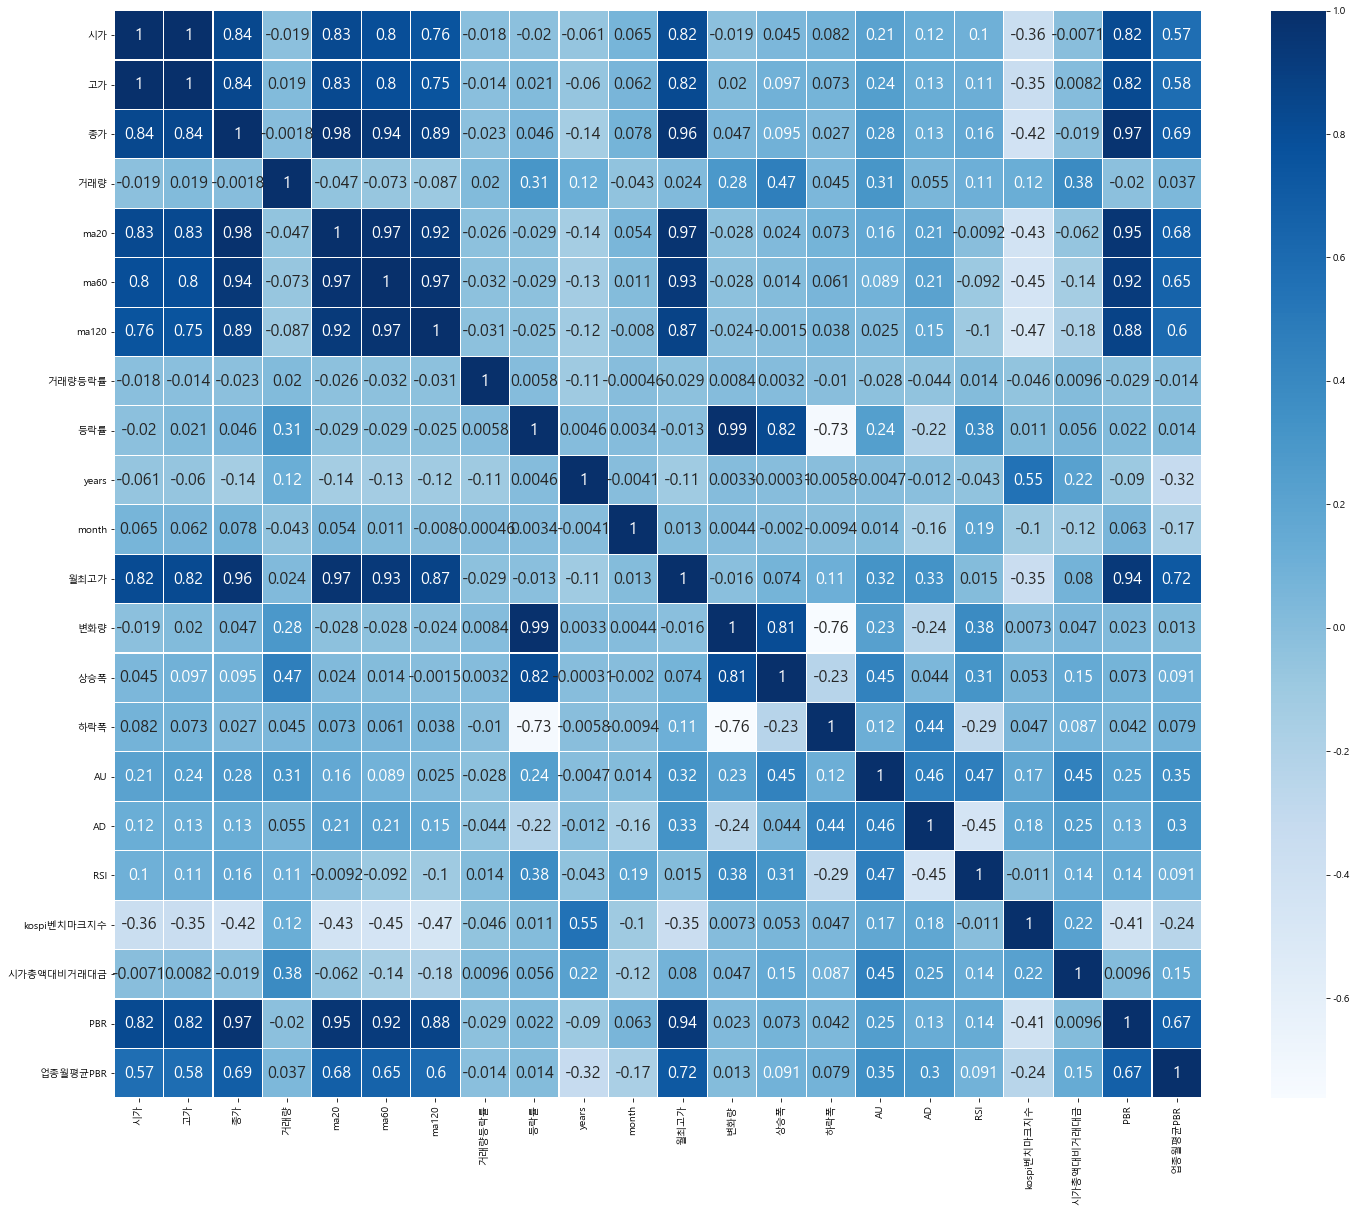

In [298]:
Yoo.corr()
plt.figure(figsize=(25,20))
sns.heatmap(Yoo.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'Blues', linecolor = "white", annot = True, annot_kws = {"size" : 16})